Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apple_stock_data.csv to apple_stock_data.csv


Load the Dataset

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv("apple_stock_data.csv")

Data Exploation

In [ ]:
# Display first few rows
print(df.head())

         Date  Open  High   Low  Close  Adj Close     Volume
0  2020-01-02  74.0  75.0  73.0   74.5       74.3  100000000
1  2020-01-03  74.1  75.1  73.1   74.6       74.4  100100000
2  2020-01-04  74.2  75.2  73.2   74.7       74.5  100200000
3  2020-01-05  74.3  75.3  73.3   74.8       74.6  100300000
4  2020-01-06  74.4  75.4  73.4   74.9       74.7  100400000


In [ ]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (100, 7)


In [ ]:
# Column names
print("Columns:", df.columns.tolist())

Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
# Data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   Open       100 non-null    float64
 2   High       100 non-null    float64
 3   Low        100 non-null    float64
 4   Close      100 non-null    float64
 5   Adj Close  100 non-null    float64
 6   Volume     100 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
# Summary statistics
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,78.950000,79.950000,77.950000,79.450000,79.250000,1.049500e+08
std,2.901149,2.901149,2.901149,2.901149,2.901149,2.901149e+06
min,74.000000,75.000000,73.000000,74.500000,74.300000,1.000000e+08
25%,76.475000,77.475000,75.475000,76.975000,76.775000,1.024750e+08
50%,78.950000,79.950000,77.950000,79.450000,79.250000,1.049500e+08
75%,81.425000,82.425000,80.425000,81.925000,81.725000,1.074250e+08
max,83.900000,84.900000,82.900000,84.400000,84.200000,1.099000e+08


Check for Missing Values and Duplicates

In [ ]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Visualize Features

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

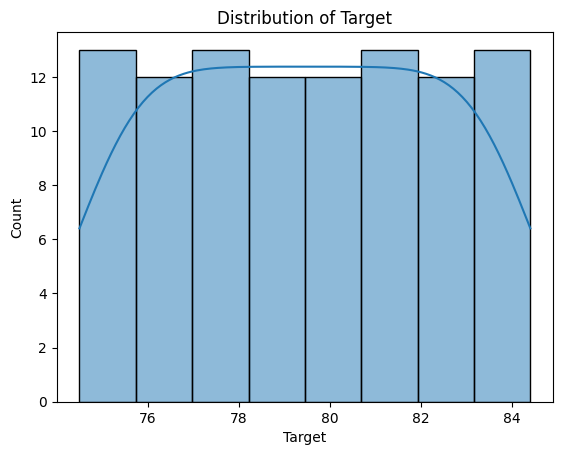

In [ ]:
# Example: Distribution of target
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.show()

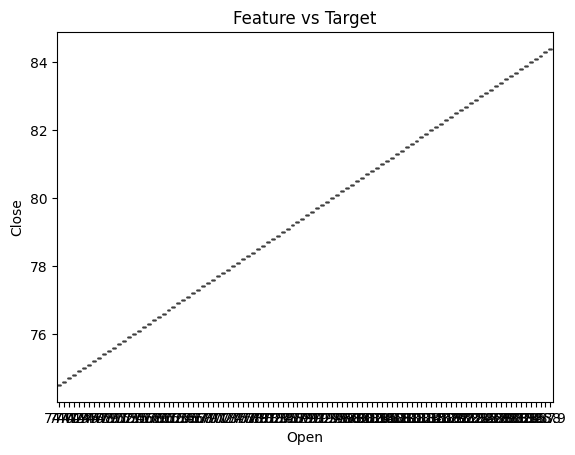

In [ ]:
# Example: Relationship between important features and target
sns.boxplot(x='Open', y='Close', data=df)
plt.title('Feature vs Target')
plt.show()

Identify Target and Features

In [ ]:
# Define target and features
target = 'Close'
features = df.columns.drop(target)

print("Features:", features)

Features: Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], dtype='object')


Convert Categorical Columns to Numerical

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Date']


In [ ]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop(target, axis=1))
y = df_encoded[target]

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Evaluvation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.34150252621177535
R2 Score: 0.9573840985572127


Make Predictions from New Input

In [ ]:
# 1. New data creation
new_data = [
    {'Open': 178.50, 'High': 180.00, 'Low': 177.80, 'Close': 179.50, 'Adj Close': 179.20, 'Volume': 58000000},
    {'Open': 179.00, 'High': 181.00, 'Low': 178.00, 'Close': 180.50, 'Adj Close': 180.20, 'Volume': 60000000},
    {'Open': 177.00, 'High': 179.00, 'Low': 176.50, 'Close': 178.00, 'Adj Close': 177.70, 'Volume': 55000000}
]

new_df = pd.DataFrame(new_data)

# 2. Add missing one-hot dummy columns
# Match your main dataset feature columns
df_temp = pd.concat([df.drop(target, axis=1), new_df], ignore_index=True)

# 3. One-hot encoding
df_temp_encoded = pd.get_dummies(df_temp, drop_first=True)

# 4. Match training columns exactly
df_temp_encoded = df_temp_encoded.reindex(columns=df_encoded.drop(target, axis=1).columns, fill_value=0)

# 5. Scale
new_input_scaled = scaler.transform(df_temp_encoded.tail(3))

# 6. Predict
predicted_values = model.predict(new_input_scaled)

# 7. Output
for i, val in enumerate(predicted_values, 1):
    print(f"🎯 Predicted value {i}: {val}")


🎯 Predicted value 1: 135.75571657239573
🎯 Predicted value 2: 136.5062299466308
🎯 Predicted value 3: 134.4303418902359
